## Diagrama de Interacción para columnas rectangulares

### Cálculo de condición balanceada

<img src='./Images/Col1.PNG' width='675px' height='300px'>

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

b = 55.88 #cm
h = 55.88 #cm
Es = 2040000 #kgf/cm2
fc = 280 #kgf/cm2
fy = 4200 #kgf/cm2
eu = 0.003 # Deformación maxima del hormigón
ey = fy/Es # Deformación de fleuncia del acero

n_capas = 5 # #de capas totales
#Los siguientes parámetros son para las capas de aacero intermedias

nvars = [5, 2, 2, 2, 5] #Numero de varillas por capa
diams = [3.175, 3.175, 3.175, 3.175, 3.175] #cm (Diametros por capa)
d_ = [6.35, 17.145, 27.94, 38.735, 49.53] #cm (distancia d por capa)

def As_(diam,nvar):
    As = np.pi*(diam**2)*0.25*nvar
    return As

Asi = []
for i in range(n_capas):
    Asi.append(As_(diams[i], nvars[i]))

if fc <= 280:
    B1 = 0.85
elif fc > 280 and fc <= 560:
    B1 = 0.85 - (0.05*((fc-280)/70))
elif fc > 560:
    B1 = 0.65

rec = 4.7625 #cm (Recubrimiento)
dest = 0 #cm (Diametro del estribo)
d_down = 3.175 #cm (Diametro Varilla exterior inferior)
d_up = 3.175 #cm (Diammetro Varilla exterior superior)
n_vdown = 5 #(Depende de las capas)
n_vup = 5 #(Depende de las capas)
As = Asi[-1] #Acero en zona de tracción
Asp = Asi[0] #Acero en zona de compresión

d = d_[-1] #(cambia para columnas con varillas de varias capas)
dp = d_[0] #(cambia para columnas con varillas de varias capas)
cb = (eu*Es*d)/((eu*Es)+fy)
ab = B1*cb
dpp = d - cb

fs = ((eu*Es)*(cb-dp))/cb
if fs >= fy:
    fs = fy
elif fs < -fy:
    fs = -fy

Cs = Asp*(fs - (0.85*fc))

fsi = []
Csi = []
Ti = []
MCsi = []
MTi = []
j = 0
jj = 0
for i in range(n_capas):
    if d_[i] <= cb:
        fsi.append(min(((eu*Es)*(cb-d_[i]))/cb,fy))
        Csi.append(Asi[i]*(fsi[i] - (0.85*fc)))
        MCsi.append(Csi[jj]*np.abs((h/2)-d_[i]))
        jj+=1
    else:
        fsi.append(max(Es*ey*((d_[i]-cb)/(d-cb)),-fy))
        Ti.append(Asi[i]*fsi[i])
        MTi.append(Ti[j]*np.abs((h/2)-d_[i]))
        j+=1


Cc = 0.85*fc*ab*b
T = As*fy

Pb = (Cc + (sum(Csi)) - (sum(Ti)))/1000 #Convirtiendo de kgf a Tonf
Mb = ((Cc*(d - (ab/2) - dpp)) + sum(MCsi) + sum(MTi))/100000 #Convirtiendo de kgf*cm a Tonf*m

eb = (Mb/Pb)*100 #cm

print(f'El momento balanceado es \u03C6Mb = {Mb*0.65} Tonf*m')
print(f'La carga axial balanceada \u03C6Pb = {Pb*0.65} Tonf')
print(f'La excentricidad en el punto balanceado es de: {eb} cm')


El momento balanceado es φMb = 86.52800635636599 Tonf*m
La carga axial balanceada φPb = 214.01943748205812 Tonf
La excentricidad en el punto balanceado es de: 40.42997560145437 cm


,0
0,-2.780801
1,8.523723
2,19.828247
3,31.132771
4,42.437295
...,...
85,958.103739
86,969.408263
87,980.712787
88,992.017311


,0
0,77.041014
1,80.313384
2,83.489666
3,86.569860
4,89.553965
...,...
85,12.156726
86,7.261578
87,2.270342
88,-2.816983


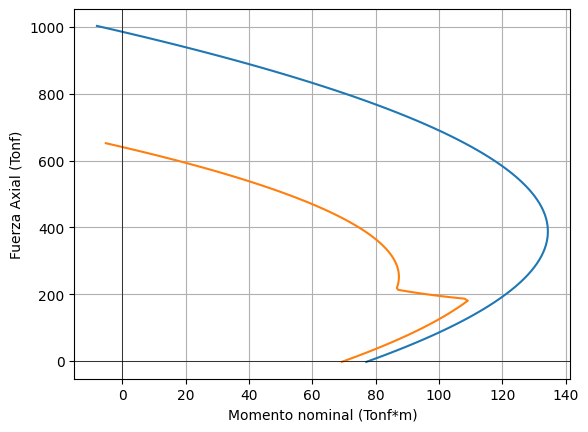

In [23]:
Pn = []
Mn = []
phiPn = []
phiMn = []
ei = []

for c in range(90):
    a = c*B1
    fsii = []
    Csii = []
    Tii = []
    MCsii = []
    MTii = []
    j = 0
    jj = 0
    for i in range(n_capas):
        if d_[i] <= cb:
            fsii.append(min(((eu*Es)*(cb-d_[i]))/cb,fy))
            Csii.append(Asi[i]*(fsi[i] - (0.85*fc)))
            MCsii.append(Csi[jj]*np.abs((h/2)-d_[i]))

            esp = 0.003*((d-(c+0.1))/(c+0.1))
            if esp <= ey:
                phi = 0.65
            elif esp > ey and esp <= (eu+ey):
                phi = 0.65 + (0.25*((1/(c/d))-((ey+eu)/eu)))
            else:
                phi = 0.9
                
            jj+=1
        else:
            fsii.append(max(Es*ey*((d_[i]-cb)/(d-cb)),-fy))
            Tii.append(Asi[i]*fsi[i])
            MTii.append(Ti[j]*np.abs((h/2)-d_[i]))
            j+=1

    Cc = 0.85*fc*a*b
    Pn.append((Cc + (sum(Csii)) - (sum(Tii)))/1000) #Convirtiendo de kgf a Tonf
    Mn.append(((Cc*(d - (a/2) - dpp)) + sum(MCsii) + sum(MTii))/100000) #Convirtiendo de kgf*cm a Tonf*m
    phiPn.append(Pn[c]*phi)
    phiMn.append(Mn[c]*phi)
    ei.append((Mn[c]/Pn[c])*100) #cm


display(pd.DataFrame(Pn))
display(pd.DataFrame(Mn))
#display(pd.DataFrame(ei))

plt.plot(Mn,Pn)
plt.plot(phiMn,phiPn)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.xlabel('Momento nominal (Tonf*m)')
plt.ylabel('Fuerza Axial (Tonf)')
plt.grid('on')
#plt.axis('equal')

### Diagrama de Interacción

In [24]:


# Pn = []
# Mn = []
# phiPn = []
# phiMn = []
# ei = []
# for e in range(0,285):
#     if e <= eb:
#         # Falla frágil por compresión
#         # fs < fy
#         # a > ab
#         # phi = 0.65
#         ep = e + dpp
#         A = 0.85*fc*(b/2)
#         B = 0.85*fc*b*(ep - d)
#         C = (Asp*(fy - (0.85*fc))*(ep - d + dp)) + (Es*eu*As*ep)
#         D = -(Es*eu)*As*ep*B1*d

#         # Encontrar las raíces del polinomio
#         raices = np.roots([A, B, C, D])
#         a = [float(raiz) for raiz in raices if np.isreal(raiz) and np.real(raiz) > 0][0]
#         c = a/B1

#         if esp <= ey:
#             phi = 0.65
#         elif esp > ey and esp <= (eu+ey):
#             phi = 0.65 + (0.25*((1/(c/d))-((ey+eu)/eu)))
#         else:
#             phi = 0.9

#         fsp = min(((Es*eu*(c-dp))/c),fy)
#         fs = min(((Es*eu*(d-c))/c),fy)

#         T = As*fs
#         Cc = 0.85*fc*a*b
#         Cs = max(Asp*(fsp-(0.85*fc)),0)
#         Pni = (Cc + Cs - T)/1000
#         Mni = Pni*e/100
#         Pn.append(Pni)
#         Mn.append(Mni)
#         phiPn.append(Pni*phi)
#         phiMn.append(Mni*phi)
#     else:
#         #Falla por tension
#         # fs = fy
#         # a < ab
#         # 0.65 <= phi <= 0.9
#         # Asumimos fsp = fy
#         ep = e + dpp
#         A = 0.425*fc*b 
#         B = 2*A*(ep - d)
#         C = (Asp*(fsp - (0.85*fc))*(ep - d + dp)) - (As*fy*ep)

#         raices = np.roots([A, B, C])

#         a = [float(raiz) for raiz in raices if np.isreal(raiz) and np.real(raiz) > 0][0]

#         c = a/B1
#         #print(c)
#         esp = 0.003*((c-dp)/c)
#         if esp <= ey:
#             phi = 0.65
#         elif esp > ey and esp <= (eu+ey):
#             phi = 0.65 + (0.25*((1/(c/d))-((ey+eu)/eu)))
#         else:
#             phi = 0.9

#         #print(esp)
#         fsp = (Es*eu*(c-dp))/c
#         if esp >= ey or esp < -ey:
#             fsp = fy*(fsp/np.abs(fsp))
#         else:
#             fsp = min((Es*eu*(c-dp))/c,fy)

#         T = As*fy
#         Cc = 0.85*fc*a*b
#         Cs = max(Asp*(fsp-(0.85*fc)),0)
#         Pni = (Cc + Cs - T)/1000
#         Mni = Pni*e/100
#         Pn.append(Pni)
#         Mn.append(Mni)
#         phiPn.append(Pni*phi)
#         phiMn.append(Mni*phi)

#     ei.append(e)

# display(pd.DataFrame(Pn))
# display(pd.DataFrame(Mn))
# #display(pd.DataFrame(ei))

# plt.plot(Mn,Pn)
# plt.plot(phiMn,phiPn)
# plt.axhline(0, color='black',linewidth=0.5)
# plt.axvline(0, color='black',linewidth=0.5)
# plt.xlabel('Momento nominal (Tonf*m)')
# plt.ylabel('Fuerza Axial (Tonf)')
# plt.grid('on')
# #plt.axis('equal')